<a href="https://colab.research.google.com/github/sonudhakane7526/sonudhakane7526/blob/main/Task_1)_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Churn Prediction (Task-1)**

Contribution - Individual

Intern Name - Vikas Dhakane

Allocated Project - Task 1  

# **1. Know Your Data**

Importing Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from datetime import datetime as dt


# Import Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

from sklearn.impute import KNNImputer
from sklearn.feature_selection import chi2

# Import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

# Import preprocessing libraries
from sklearn.preprocessing import MinMaxScaler

# Import ML Model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Import warnings
import warnings
warnings.filterwarnings('ignore')

Loading Dataset

In [ ]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

Dataset First View

In [ ]:
# Dataset First Look
# View top 5 rows of the dataset
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [ ]:
# View last 5 rows of the dataset
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  7043
Number of columns are:  21


Dataset Information

In [ ]:
# Dataset Info
# Checking information about the dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Duplicate Values

In [ ]:
# Checking Dataset Duplicate Value Count
df.duplicated().sum()

0

Missing Values/Null Values

In [ ]:
# Converting Total Charges to a numerical data type.
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

# Checking missing values/null values count for each column
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

# **2. Understanding Your Variables**

In [ ]:
# Dataset Columns
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# Dataset Describe (all columns included)
df.describe(include= 'all').round(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.00,7043,7043,7043.00,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.00,7032.00,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,NaN,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,NaN,0.16,NaN,NaN,32.37,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.76,2283.30,NaN
std,NaN,NaN,0.37,NaN,NaN,24.56,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.09,2266.77,NaN
min,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.25,18.80,NaN
25%,NaN,NaN,0.00,NaN,NaN,9.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.50,401.45,NaN
50%,NaN,NaN,0.00,NaN,NaN,29.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.35,1397.48,NaN
75%,NaN,NaN,0.00,NaN,NaN,55.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.85,3794.74,NaN


Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable using a for loop
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in customerID is 7043
No. of unique values in gender is 2
No. of unique values in SeniorCitizen is 2
No. of unique values in Partner is 2
No. of unique values in Dependents is 2
No. of unique values in tenure is 73
No. of unique values in PhoneService is 2
No. of unique values in MultipleLines is 3
No. of unique values in InternetService is 3
No. of unique values in OnlineSecurity is 3
No. of unique values in OnlineBackup is 3
No. of unique values in DeviceProtection is 3
No. of unique values in TechSupport is 3
No. of unique values in StreamingTV is 3
No. of unique values in StreamingMovies is 3
No. of unique values in Contract is 3
No. of unique values in PaperlessBilling is 2
No. of unique values in PaymentMethod is 4
No. of unique values in MonthlyCharges is 1585
No. of unique values in TotalCharges is 6530
No. of unique values in Churn is 2


# 3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between **variables**

Chart - 1 : Gender Distribution

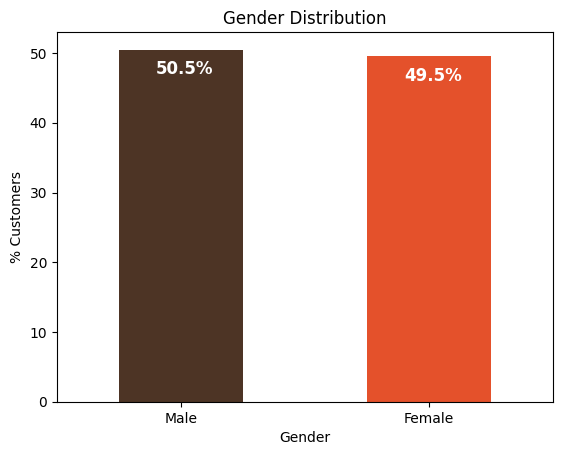

In [ ]:
# Chart - 1 Visualization code for Distribution of Gender

# Define the data and colors
data = df['gender'].value_counts(normalize=True) * 100
colors = ['#4D3425', '#E4512B']

# Create a bar plot
ax = data.plot(kind='bar', stacked=True, color=colors, rot=0)

# Set labels and title
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# Create a list to collect the plt.patches data
totals = []

# Find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# Set individual bar lables using above list
total = sum(totals)

# Add percentage labels on top of the bars
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

# Show the plot
plt.show()

Chart - 2 : Senior Citizen Distribution

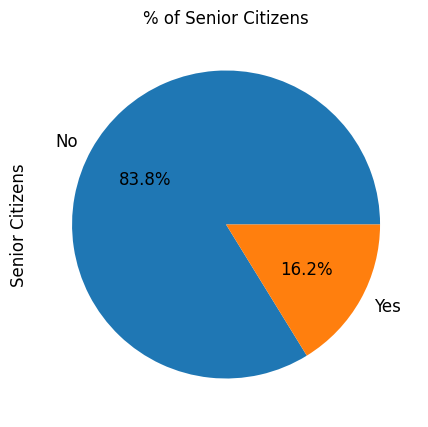

In [ ]:
# Chart - 2 Visualization code for Distribution of Senior Citizen

# Calculate the percentage of Senior Citizens
senior_citizen_percentages = (df['SeniorCitizen'].value_counts() * 100.0 / len(df))

# Create a pie plot
ax = senior_citizen_percentages.plot.pie(autopct='%.1f%%', labels=['No', 'Yes'], figsize=(5, 5), fontsize=12)

# Format y-axis as percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Set labels
ax.set_ylabel('Senior Citizens', fontsize=12)
ax.set_title('% of Senior Citizens', fontsize=12)

# Display the plot
plt.show()


Chart - 3 : Customers Distribution with Dependents and Partners


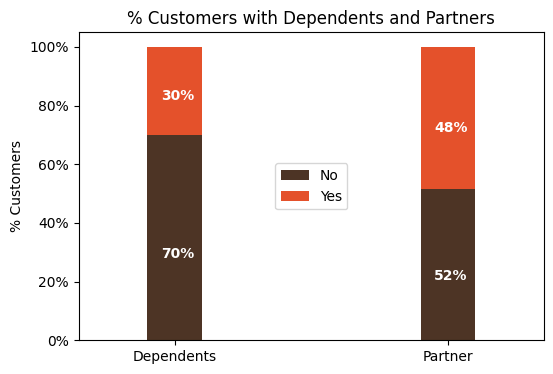

In [ ]:
# Chart - 3 Visualization code for Distribution of Customers with Dependents and Partners

# Reshape the data using 'melt' and group by 'variable' and 'value'
df2 = pd.melt(df, id_vars=['customerID'], value_vars=['Dependents', 'Partner'])
df3 = df2.groupby(['variable', 'value']).count().unstack()
df3 = df3 * 100 / len(df)

# Define colors for the bars
colors = ['#4D3425', '#E4512B']

# Create a stacked bar plot
ax = df3.loc[:, 'customerID'].plot.bar(stacked=True, color=colors, figsize=(6, 4), rot=0, width=0.2)

# Format y-axis as percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Set labels and title
ax.set_ylabel('% Customers', size=10)
ax.set_xlabel('')
ax.set_title('% Customers with Dependents and Partners', size=12)

# Add a legend
ax.legend(loc='center', prop={'size': 10})

# Add percentage labels on top of the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x() + 0.25 * width, p.get_y() + 0.4 * height),
                color='white', weight='bold', size=10)

# Show the plot
plt.show()

Chart - 4 : Distribution of Tenure by Customers

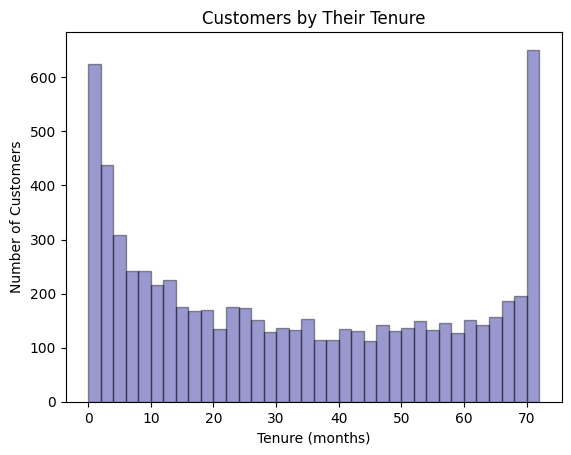

In [ ]:
# Chart - 4 Visualization code for Distribution of Tenure by Sum of Customer

# Create a histogram with a custom color palette
ax = sns.distplot(df['tenure'], hist=True, kde=False,
                 bins=int(180/5), color='darkblue',
                 hist_kws={'edgecolor': 'black'},
                 kde_kws={'linewidth': 4})

# Set labels & title
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Customers by Their Tenure')

# Show the plot
plt.show()

Chart - 5 : Customers by Contract Type

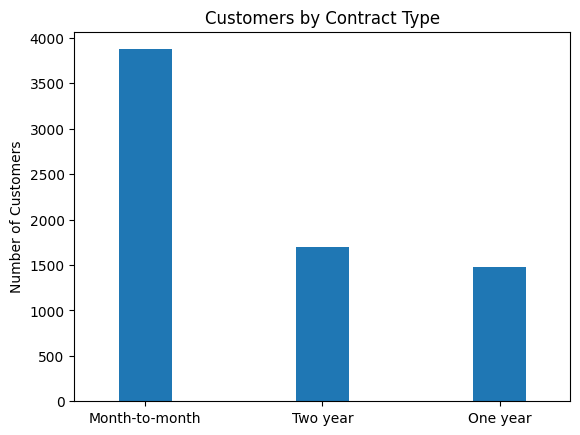

In [ ]:
# Chart - 5 Visualization code for Customers by Contract Type

# Create a bar plot for the count of customers by contract type
ax = df['Contract'].value_counts().plot(kind='bar', rot=0, width=0.3)

# Set labels and title
ax.set_ylabel('Number of Customers')
ax.set_title('Customers by Contract Type')

# Show the plot
plt.show()

Chart - 6 : Tenure of Customers based on their Contract Type

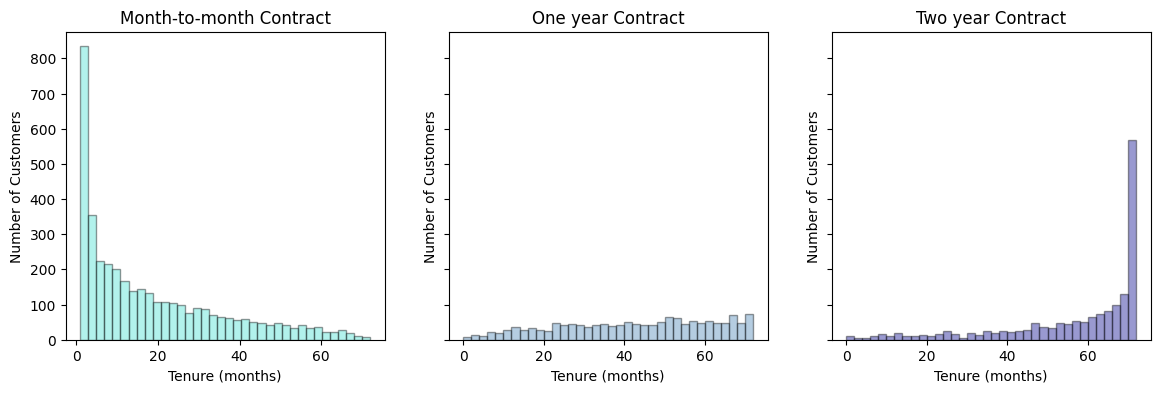

In [ ]:
# Chart - 6 Visualization code for Tenure of Customers based on their Contract Type

# Define a custom color palette for each contract type
colors = ['turquoise', 'steelblue', 'darkblue']

# Create subplots for different contract types
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(14, 4))

# Define a function for creating a histogram for a specific contract type
def plot_contract_histogram(data, contract_type, ax, color):
    sns.distplot(data[data['Contract'] == contract_type]['tenure'],
                 hist=True, kde=False,
                 bins=int(180/5),
                 color=color,
                 hist_kws={'edgecolor': 'black'},
                 kde_kws={'linewidth': 4},
                 ax=ax)
    ax.set_ylabel('Number of Customers', size=10)
    ax.set_xlabel('Tenure (months)', size=10)
    ax.set_title(f'{contract_type} Contract', size=12)

# Create histograms for different contract types using the function
plot_contract_histogram(df, 'Month-to-month', ax1, colors[0])
plot_contract_histogram(df, 'One year', ax2, colors[1])
plot_contract_histogram(df, 'Two year', ax3, colors[2])

# Show the plot
plt.show()

Chart - 7 : Distribution of Various Services

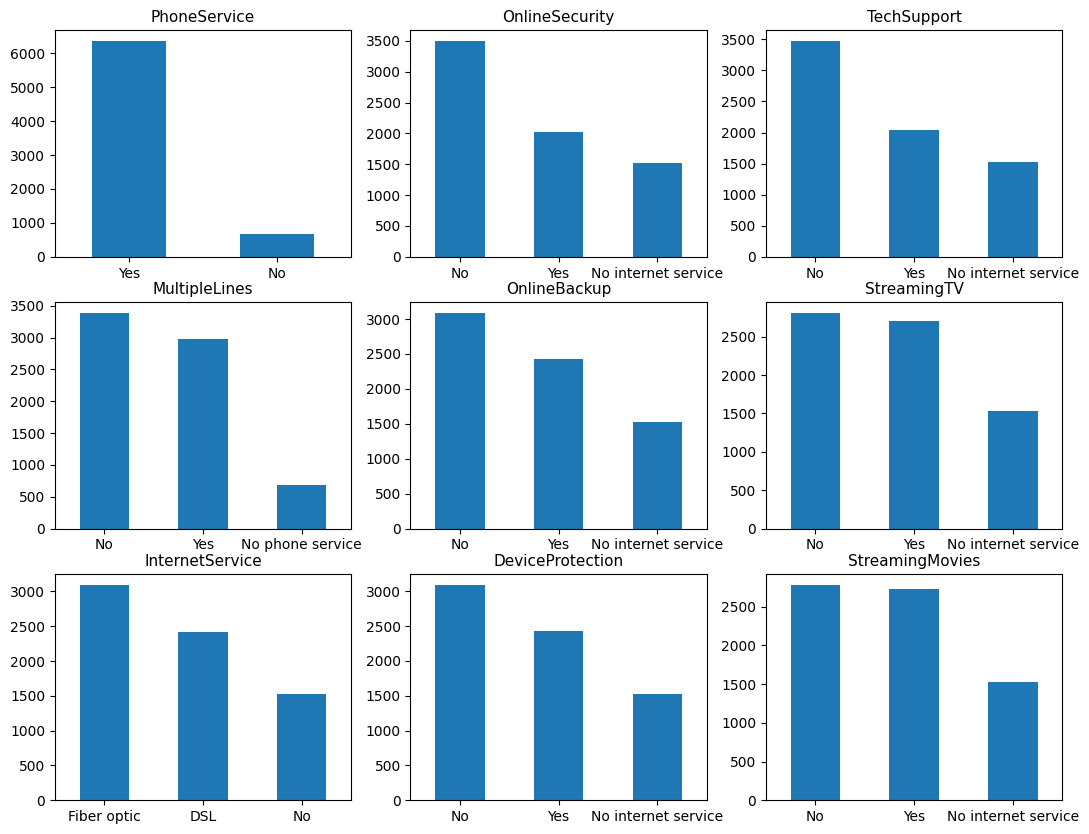

In [ ]:
# Chart - 7 Visualization code for Distribution of Various Services used by Customers

# List of services
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create subplots in a 3x3 grid
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 10))

# Iterate through the services
for i, item in enumerate(services):
    # Determine the subplot location based on the index
    if i < 3:
        ax = df[item].value_counts().plot(kind='bar', ax=axes[i, 0], rot=0)
    elif 3 <= i < 6:
        ax = df[item].value_counts().plot(kind='bar', ax=axes[i-3, 1], rot=0)
    elif 6 <= i < 9:
        ax = df[item].value_counts().plot(kind='bar', ax=axes[i-6, 2], rot=0)

    ax.set_title(item, size=11)  # Set the title for each subplot

# Show the plot
plt.show()

Chart - 8 : Relation between Monthly and Total Charges

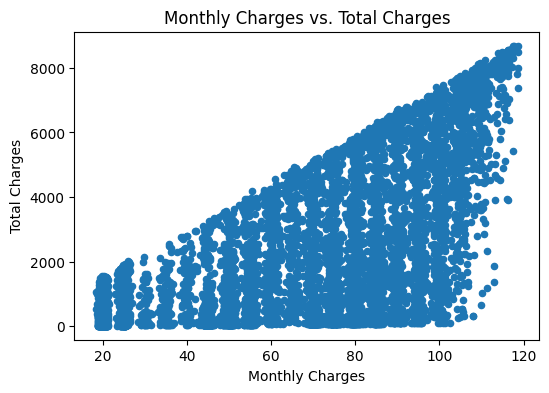

In [ ]:
# Chart - 8 Visualization code for Relation between Monthly and Total Charges

# Create a scatter plot to visualize the relationship between MonthlyCharges and TotalCharges
df[['MonthlyCharges', 'TotalCharges']].plot.scatter(x='MonthlyCharges', y='TotalCharges', figsize=(6, 4))

# Set labels & title
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.title('Monthly Charges vs. Total Charges')

# Display the plot
plt.show()

Chart - 9 : Churn Rate

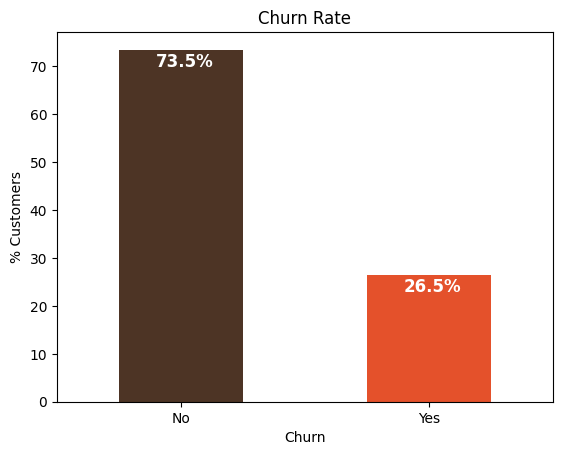

In [ ]:
# Chart - 9 Visualization code for Churn Distribution

# Define the data and colors
data = df['Churn'].value_counts(normalize=True) * 100
colors = ['#4D3425', '#E4512B']

# Create a bar plot
ax = data.plot(kind='bar', stacked=True, color=colors, rot=0)

# Set labels and title
ax.set_xlabel('Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn Rate')

# Create a list to collect the plt.patches data
totals = []

# Find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# Set individual bar lables using above list
total = sum(totals)

# Add percentage labels on top of the bars
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

# Show the plot
plt.show()


Chart - 10 : Tenure Distribution for Different Churn Categories


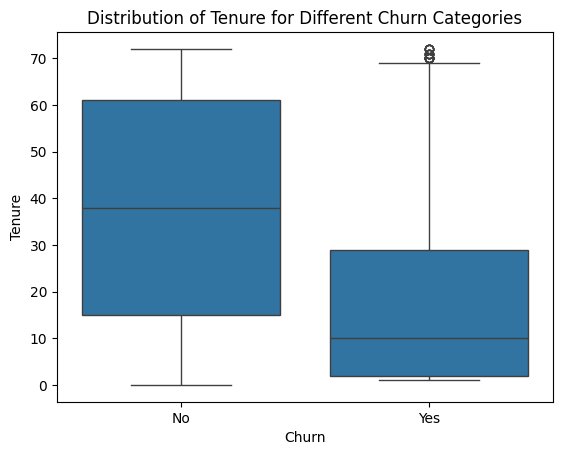

In [ ]:
# Chart - 10 Visualization code for Tenure Distribution for Different Churn Categories

# Create a box plot to visualize the distribution of tenure for each churn category
sns.boxplot(x=df['Churn'], y=df['tenure'])

# Set labels & title
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.title('Distribution of Tenure for Different Churn Categories')

# Display the plot
plt.show()

Chart - 11 : Churn by Contract Type

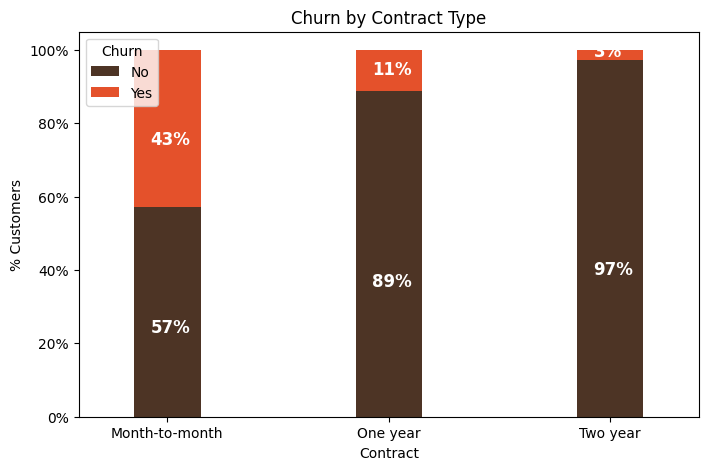

In [ ]:
# Chart - 11 Visualization code for Churn Distribution by Different Contract Type

# Define custom colors for the bars
colors = ['#4D3425', '#E4512B']

# Group data by Contract and Churn, and calculate the size of each group
contract_churn = df.groupby(['Contract', 'Churn']).size().unstack()

# Calculate the percentage of customers for each contract type
contract_churn_percentage = (contract_churn.T * 100.0 / contract_churn.T.sum()).T

# Create a stacked bar plot to visualize churn by contract type
ax = contract_churn_percentage.plot(kind='bar', width=0.3, stacked=True, rot=0, figsize=(8, 5), color=colors)

# Format the y-axis as a percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Add a legend with custom font size and title
ax.legend(loc='best', prop={'size': 10}, title='Churn')

# Set labels & title
ax.set_ylabel('% Customers', size=10)
ax.set_title('Churn by Contract Type', size=12)

# Add data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x() + 0.25 * width, p.get_y() + 0.4 * height),
                color='white', weight='bold', size=12)

# Display the plot
plt.show()

Chart - 12 : Churn by Seniority Level

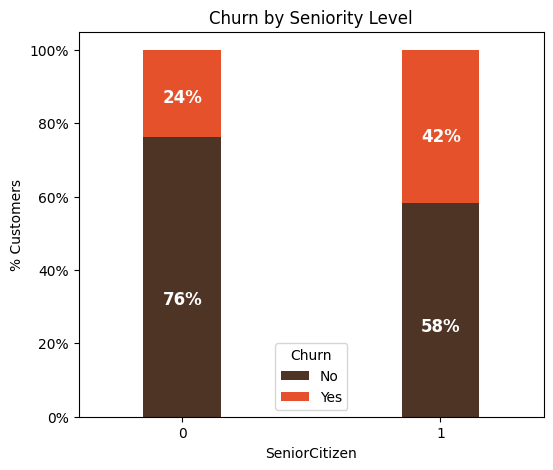

In [ ]:
# Chart - 12 Visualization code for Churn Distribution by Seniority Level

# Define custom colors for the bars
colors = ['#4D3425', '#E4512B']

# Group data by Senior Citizen and Churn, and calculate the size of each group
seniority_churn = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()

# Calculate the percentage of customers for each seniority level
seniority_churn_percentage = (seniority_churn.T * 100.0 / seniority_churn.T.sum()).T

# Create a stacked bar plot to visualize churn by contract type
ax = seniority_churn_percentage.plot(kind='bar', width=0.3, stacked=True, rot=0, figsize=(6, 5), color=colors)

# Format the y-axis as a percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Add a legend with custom font size and title
ax.legend(loc='best', prop={'size': 10}, title='Churn')

# Set labels & title
ax.set_ylabel('% Customers', size=10)
ax.set_title('Churn by Seniority Level', size=12)

# Add data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x() + 0.25 * width, p.get_y() + 0.4 * height),
                color='white', weight='bold', size=12)

# Display the plot
plt.show()

Chart - 13 : Monthly Charges Distribution by Churn

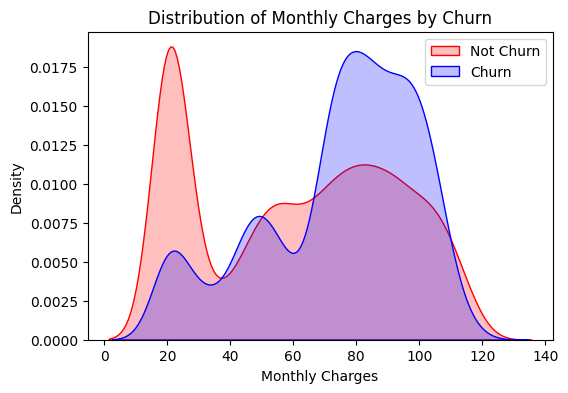

In [ ]:
# Chart - 13 Visualization code for Monthly Charges Distribution by Churn

# Create two overlaid KDE plots for MonthlyCharges, one for customers who didn't churn (No) and one for customers who churned (Yes).
ax = sns.kdeplot(df.MonthlyCharges[df["Churn"] == 'No'], color="Red", shade=True)
ax = sns.kdeplot(df.MonthlyCharges[df["Churn"] == 'Yes'], ax=ax, color="Blue", shade=True)

# Set the size of the plot
ax.figure.set_size_inches(6, 4)

# Add a legend to distinguish between "Not Churn" and "Churn"
ax.legend(["Not Churn", "Churn"], loc='upper right')

# Set labels & title
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of Monthly Charges by Churn')

# Display the plot
plt.show()

Chart - 14 : Total Charges Distribution by Churn

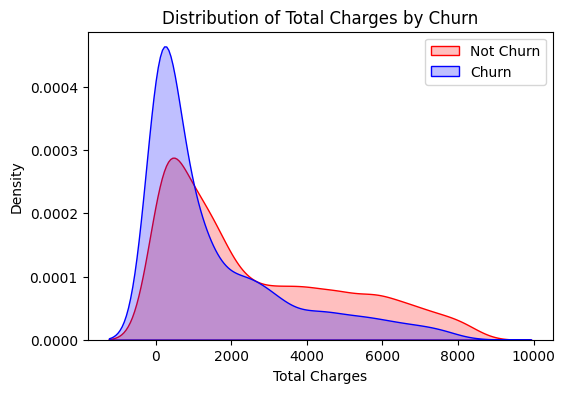

In [ ]:
# Chart - 14 Visualization code for Total Charges Distribution by Churn

# Create two overlaid KDE plots for TotalCharges, one for customers who didn't churn (No) and one for customers who churned (Yes).
ax = sns.kdeplot(df.TotalCharges[df["Churn"] == 'No'], color="Red", shade=True)
ax = sns.kdeplot(df.TotalCharges[df["Churn"] == 'Yes'], ax=ax, color="Blue", shade=True)

# Set the size of the plot
ax.figure.set_size_inches(6, 4)

# Add a legend to distinguish between "Not Churn" and "Churn"
ax.legend(["Not Churn", "Churn"], loc='upper right')

# Set labels & title
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of Total Charges by Churn')

# Display the plot
plt.show()

Chart - 15 : Correlation Heatmap

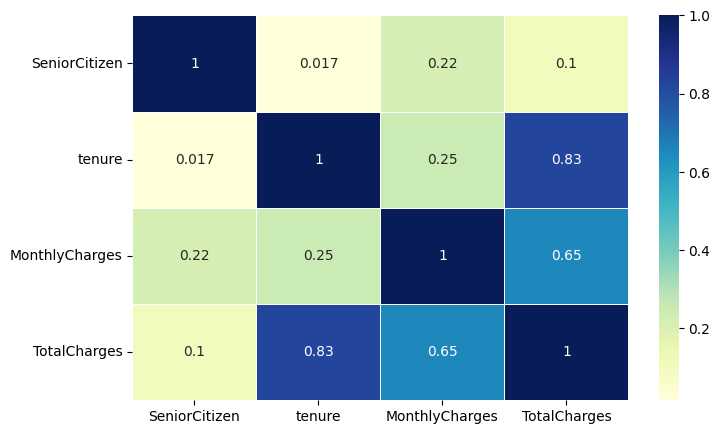

In [ ]:
# Correlation Heatmap visualization code
# Create a figure with a specific size for the heatmap
plt.figure(figsize=(8, 5))

# Generate a correlation heatmap for the selected data
sns.heatmap(df.corr(),annot=True,linewidths=.5,cmap="YlGnBu")

# Display the heatmap
plt.show()

Chart - 16 : Pair Plot

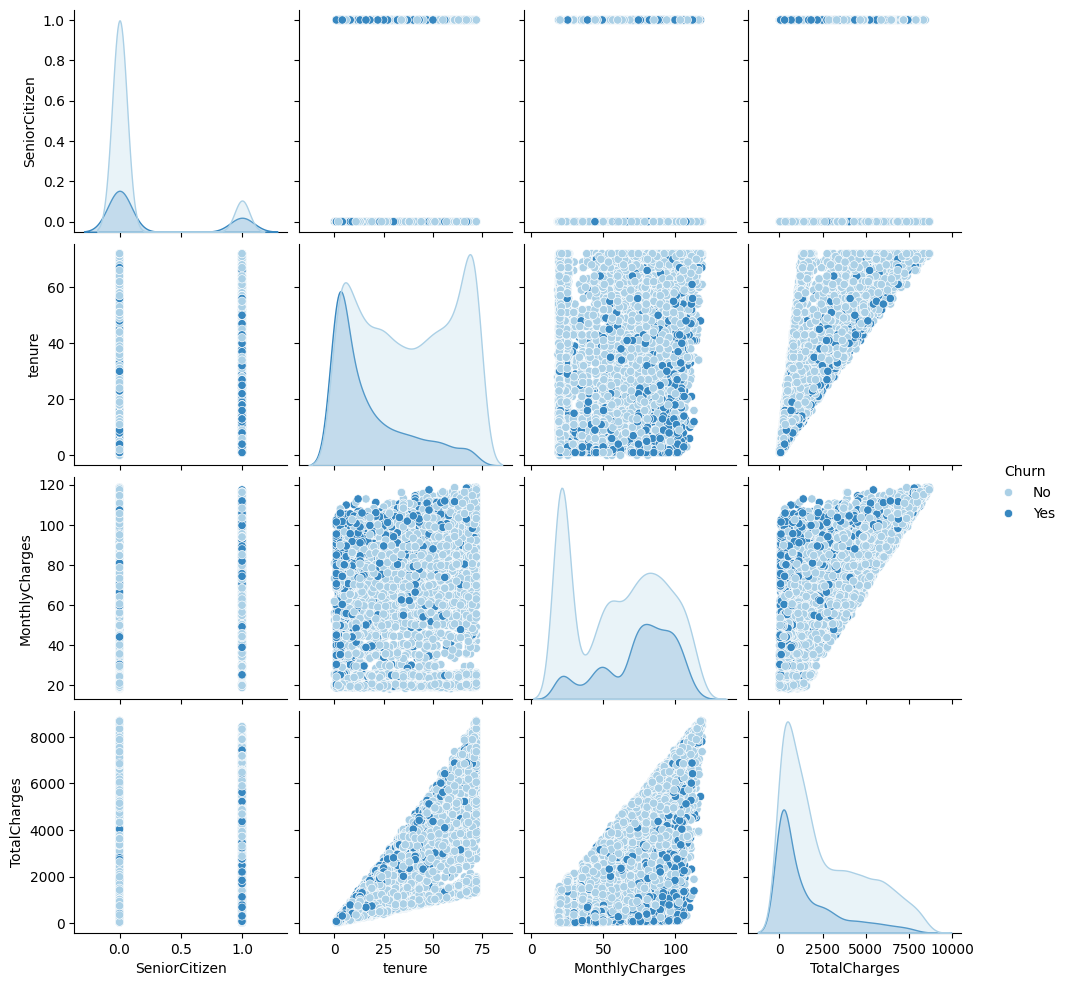

In [ ]:
# Pairplot for mean columns
sns.pairplot(df, hue='Churn', palette='Blues')

# Display Chart
plt.show()

# 4. Feature Engineering & Data Pre-**processing**

1. Handling Missing Values

In [ ]:
# Dropping missing values from the dataset
df.dropna(inplace = True)

2. Feature Selection

In [ ]:
# Select features wisely to avoid overfitting
# Remove customer IDs from the updated data set
df = df.iloc[:,1:]

In [ ]:
# Updated columns
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

3. Categorical Encoding

In [ ]:
# Converting the predictor variable in a binary numeric variable
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

# Encoding all the categorical variables
df_dummies = pd.get_dummies(df)

4. Data Splitting

In [ ]:
# Defining the X and y
X = df_dummies.drop(columns = ['Churn'])
y = df_dummies['Churn'].values

In [ ]:
# Splitting the data into training and testing sets
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

5. Data Scaling

In [ ]:
# Create a MinMaxScaler object to standardize the data
scaler = MinMaxScaler(feature_range = (0,1))

# Apply the MinMaxScaler to the training data (X_train) to standardize it
X_train = scaler.fit_transform(X_train)

# Apply the same standardization to the testing data (X_test) to maintain consistency
X_test = scaler.transform(X_test)

# 5. ML Model **Implementation**

In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    '''The function will take model, x train, x test, y train, y test
    and then it will fit the model, then make predictions on the trained model,
    it will then print roc-auc score of train and test, then plot the roc, auc curve,
    print confusion matrix for train and test, then print classification report for train and test,
    then plot the feature importances if the model has feature importances,
    and finally it will return the following scores as a list:
    recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test
    '''

    # fit the model on the training data
    model.fit(X_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    pred_prob_train = model.predict_proba(X_train)[:,1]
    pred_prob_test = model.predict_proba(X_test)[:,1]

    # calculate ROC AUC score
    roc_auc_train = roc_auc_score(y_train, y_pred_train)
    roc_auc_test = roc_auc_score(y_test, y_pred_test)
    print("\nTrain ROC AUC:", roc_auc_train)
    print("Test ROC AUC:", roc_auc_test)

    # plot the ROC curve
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pred_prob_train)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred_prob_test)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr_train, tpr_train, label="Train ROC AUC: {:.2f}".format(roc_auc_train))
    plt.plot(fpr_test, tpr_test, label="Test ROC AUC: {:.2f}".format(roc_auc_test))
    plt.legend()
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test ]
    return model_score

In [ ]:
# Create a score dataframe
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test','ROC-AUC Train', 'ROC-AUC Test','F1 macro Train', 'F1 macro Test'])

**ML Model : Logistic Regression**

In [ ]:
# ML Model - 1 Implementation
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)

# Model is trained (fit) and predicted in the evaluate model

1. Explaining the ML Model used and it's performance using Evaluation metric Score Chart.


Train ROC AUC: 0.7273846639727259
Test ROC AUC: 0.7000533206330143


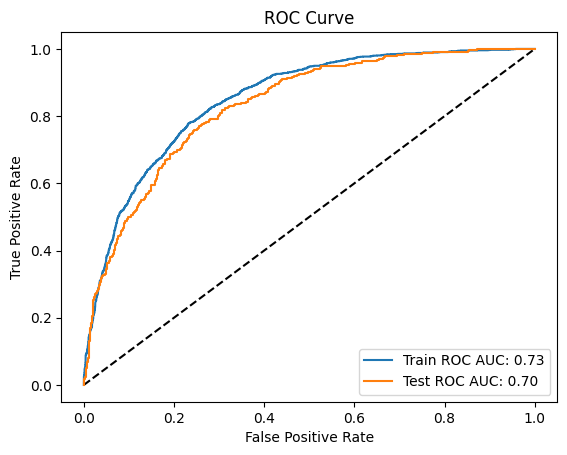


Confusion Matrix:


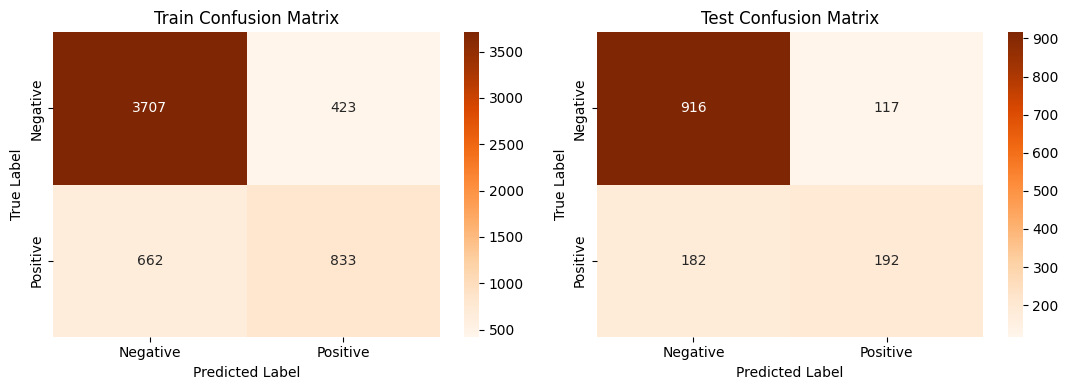


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.848478 | 0.897579 |   0.872338 | 4130        |
| 1            |    0.663217 | 0.557191 |   0.605598 | 1495        |
| accuracy     |    0.807111 | 0.807111 |   0.807111 |    0.807111 |
| macro avg    |    0.755847 | 0.727385 |   0.738968 | 5625        |
| weighted avg |    0.79924  | 0.807111 |   0.801444 | 5625        |

Test Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.834244 | 0.886738 |   0.85969  | 1033        |
| 1            |    0.621359 | 0.513369 |   0.562225 |  374        |
| accuracy     |    0.787491 | 0.787491 |   0.787491 |    0.787491 |
| macro avg    |    0.727802 | 0.700053 |   0.710958 | 1407        |
| weighted avg |    0.777656 | 0.787491 |   

In [ ]:
# Visualizing evaluation Metric Score chart
lr_score = evaluate_model(lr_model, X_train, X_test, y_train, y_test)

In [ ]:
# Updated Evaluation metric Score Chart
score['Logistic Regression'] = lr_score
score

,Logistic Regression
Precision Train,0.799240
Precision Test,0.777656
Recall Train,0.807111
Recall Test,0.787491
Accuracy Train,0.807111
Accuracy Test,0.787491
ROC-AUC Train,0.727385
ROC-AUC Test,0.700053
F1 macro Train,0.801444
F1 macro Test,0.780620


2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Define the hyperparameter grid
param_grid = {'C': [100,10,1,0.1,0.01,0.001,0.0001],
              'penalty': ['l1', 'l2'],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Initializing the logistic regression model
logreg = LogisticRegression(fit_intercept=True, max_iter=10000, random_state=0)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=4, random_state=0)

# Using GridSearchCV to tune the hyperparameters using cross-validation
grid = GridSearchCV(logreg, param_grid, cv=rskf)
grid.fit(X_train, y_train)

# Select the best hyperparameters found by GridSearchCV
best_params = grid.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'C': 100, 'penalty': 'l1', 'solver': 'saga'}


In [ ]:
# Initiate model with best parameters
lr_model2 = LogisticRegression(C=best_params['C'],
                                  penalty=best_params['penalty'],
                                  solver=best_params['solver'],
                                  max_iter=10000, random_state=0)


Train ROC AUC: 0.7312194805930989
Test ROC AUC: 0.7018742461342542


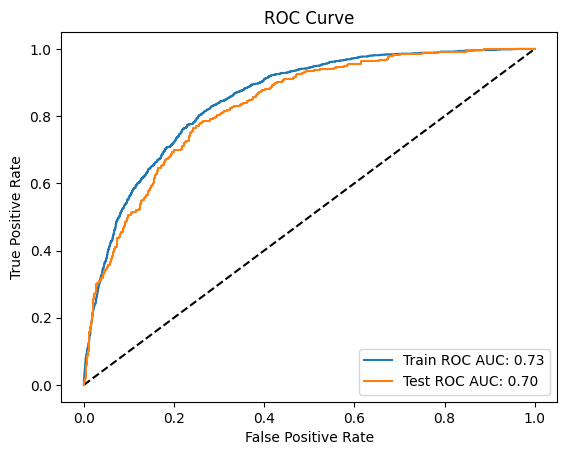


Confusion Matrix:


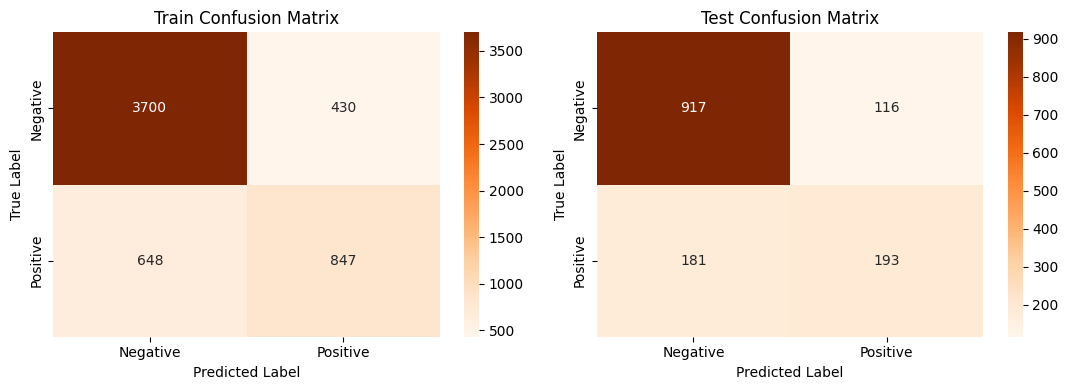


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.850966 | 0.895884 |   0.872847 | 4130        |
| 1            |    0.663273 | 0.566555 |   0.611111 | 1495        |
| accuracy     |    0.808356 | 0.808356 |   0.808356 |    0.808356 |
| macro avg    |    0.75712  | 0.731219 |   0.741979 | 5625        |
| weighted avg |    0.801081 | 0.808356 |   0.803284 | 5625        |

Test Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.835155 | 0.887706 |   0.860629 | 1033        |
| 1            |    0.624595 | 0.516043 |   0.565154 |  374        |
| accuracy     |    0.788913 | 0.788913 |   0.788913 |    0.788913 |
| macro avg    |    0.729875 | 0.701874 |   0.712891 | 1407        |
| weighted avg |    0.779185 | 0.788913 |   

In [ ]:
# Visualizing evaluation Metric Score chart
lr_score2 = evaluate_model(lr_model2, X_train, X_test, y_train, y_test)

In [ ]:
score['Logistic regression tuned'] = lr_score2

In [ ]:
# Updated Evaluation metric Score Chart
score

,Logistic Regression,Logistic regression tuned
Precision Train,0.799240,0.801081
Precision Test,0.777656,0.779185
Recall Train,0.807111,0.808356
Recall Test,0.787491,0.788913
Accuracy Train,0.807111,0.808356
Accuracy Test,0.787491,0.788913
ROC-AUC Train,0.727385,0.731219
ROC-AUC Test,0.700053,0.701874
F1 macro Train,0.801444,0.803284
F1 macro Test,0.780620,0.782087


from matplotlib import pyplot as plt
score['Logistic Regression'].plot(kind='hist', bins=20, title='Logistic Regression')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
score['Logistic regression tuned'].plot(kind='hist', bins=20, title='Logistic regression tuned')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
score.plot(kind='scatter', x='Logistic Regression', y='Logistic regression tuned', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
score['Logistic Regression'].plot(kind='line', figsize=(8, 4), title='Logistic Regression')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
score['Logistic regression tuned'].plot(kind='line', figsize=(8, 4), title='Logistic regression tuned')
plt.gca().spines[['top', 'right']].set_visible(False)

# ***THANK YOU!***




